Spotify Streaming data from April 3rd, 2023 - March 28th, 2024 from my personal account

Import Libraries

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from datetime import date

Import data from separately converted to spreadsheet format file (raw data is in JSON format)

In [6]:
# use this line of code when you are not calling the file directly and you need to specify the path to it
# df = pd.read_excel(r'/Users/Downloads/Spotify Account Data/StreamingHistory_music_cleaned.xlsx')

filename = "StreamingHistory_music_cleaned.xlsx"
df = pd.read_excel(filename)
df

,endTime,date,weekday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
0,2023-04-03 09:20,2023-04-03,Tue,09:20,Two Door Cinema Club,What You Know,185063,3.084383,Y
1,2023-04-03 09:21,2023-04-03,Tue,09:21,Sade,"The Big Unknown (From ""Widows"")",70890,1.181500,N
2,2023-04-03 09:25,2023-04-03,Tue,09:25,Jill Scott,Golden,231560,3.859333,Y
3,2023-04-03 09:28,2023-04-03,Tue,09:28,Durand Jones & The Indications,Sea Gets Hotter,197226,3.287100,Y
4,2023-04-03 09:32,2023-04-03,Tue,09:32,Nicola Conte,A Time for Spring,237573,3.959550,Y
...,...,...,...,...,...,...,...,...,...
3080,2024-03-27 21:25,2024-03-27,Thu,21:25,Oscar Kowalski,La grille de l’école,164849,2.747483,Y
3081,2024-03-27 21:28,2024-03-27,Thu,21:28,Nikolas Belalis,Behind Frozen Eyes,170898,2.848300,Y
3082,2024-03-27 21:30,2024-03-27,Thu,21:30,Rich Mortimer,Moment of Trust,149474,2.491233,Y
3083,2024-03-27 21:32,2024-03-27,Thu,21:32,Saah,Still Are,147784,2.463067,Y


In [7]:
skippedsongs = df[ df['Include Song'] == "N" ].index #assigning a variable to the skipped songs, played for less than 2 minutes
df.drop(skippedsongs, inplace = True) #dropping skipped songs

In [8]:
df #new dataset without the songs played for <2min

,endTime,date,weekday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
0,2023-04-03 09:20,2023-04-03,Tue,09:20,Two Door Cinema Club,What You Know,185063,3.084383,Y
2,2023-04-03 09:25,2023-04-03,Tue,09:25,Jill Scott,Golden,231560,3.859333,Y
3,2023-04-03 09:28,2023-04-03,Tue,09:28,Durand Jones & The Indications,Sea Gets Hotter,197226,3.287100,Y
4,2023-04-03 09:32,2023-04-03,Tue,09:32,Nicola Conte,A Time for Spring,237573,3.959550,Y
5,2023-04-03 09:36,2023-04-03,Tue,09:36,Billie Holiday,You've Changed - Studio Rio Version,226906,3.781767,Y
...,...,...,...,...,...,...,...,...,...
3079,2024-03-27 21:22,2024-03-27,Thu,21:22,Joseph Nimoh,Impressions,225474,3.757900,Y
3080,2024-03-27 21:25,2024-03-27,Thu,21:25,Oscar Kowalski,La grille de l’école,164849,2.747483,Y
3081,2024-03-27 21:28,2024-03-27,Thu,21:28,Nikolas Belalis,Behind Frozen Eyes,170898,2.848300,Y
3082,2024-03-27 21:30,2024-03-27,Thu,21:30,Rich Mortimer,Moment of Trust,149474,2.491233,Y


In [9]:
#check value count for each variable (in each column)
df.count()

endTime         2261
date            2261
weekday         2261
time            2261
artistName      2261
trackName       2261
msPlayed        2261
minsPlayed      2261
Include Song    2261
dtype: int64

In [10]:
#check shape of the dataset - (rows, columns)
print(df.shape)

(2261, 9)


 # Q: What day of the week are songs streamed most?

In [11]:
# select the relevant columns
df[['date','weekday', 'minsPlayed']]

,date,weekday,minsPlayed
0,2023-04-03,Tue,3.084383
2,2023-04-03,Tue,3.859333
3,2023-04-03,Tue,3.287100
4,2023-04-03,Tue,3.959550
5,2023-04-03,Tue,3.781767
...,...,...,...
3079,2024-03-27,Thu,3.757900
3080,2024-03-27,Thu,2.747483
3081,2024-03-27,Thu,2.848300
3082,2024-03-27,Thu,2.491233


In [12]:
#Assigning a variable to the weekdays to keep them in the proper order for visualisations
day = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [13]:
# Counting up the minutes played each day of the week for the data period (1 year)
mins=df.groupby('weekday')['minsPlayed'].sum().reindex(day)
mins

weekday
Mon    1012.601733
Tue    1153.848317
Wed     918.324233
Thu    1872.920267
Fri    1764.965350
Sat    1071.891367
Sun     183.248217
Name: minsPlayed, dtype: float64

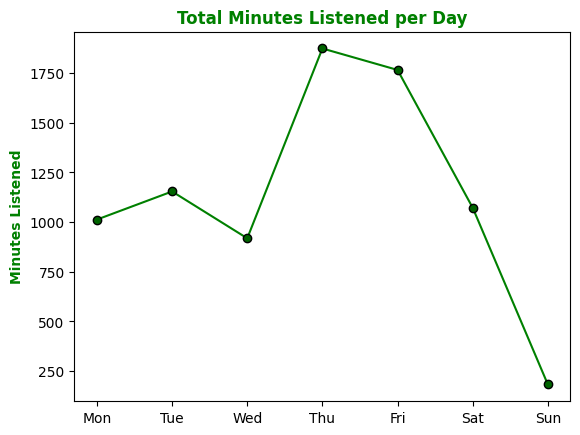

In [14]:
# Creating a line chart to display minutes listened on each day of the week, summed up for the entire period, in this case 1 year

min_day = df.groupby('weekday')['minsPlayed'].sum().reindex(day)
plt.plot(min_day, color='Green', marker="o", mfc='darkgreen', mec= "k")
#mfc= 'marker face color', mec= 'marker edge color'
plt.ylabel('Minutes Listened', fontweight="bold", color="green")
plt.title('Total Minutes Listened per Day', fontweight="bold", color="green")
plt.show()

Analysis: From the line chart we can see that I listened to music the most on Thursday and the least on Sundays. Based on this, new music ads should be played on Thursdays as I am more likely to see it and try it. 

 # Q: What part of the day are songs streamed most?

In [15]:
#Select the relevant columns
df[['time', 'minsPlayed']]
df

,endTime,date,weekday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
0,2023-04-03 09:20,2023-04-03,Tue,09:20,Two Door Cinema Club,What You Know,185063,3.084383,Y
2,2023-04-03 09:25,2023-04-03,Tue,09:25,Jill Scott,Golden,231560,3.859333,Y
3,2023-04-03 09:28,2023-04-03,Tue,09:28,Durand Jones & The Indications,Sea Gets Hotter,197226,3.287100,Y
4,2023-04-03 09:32,2023-04-03,Tue,09:32,Nicola Conte,A Time for Spring,237573,3.959550,Y
5,2023-04-03 09:36,2023-04-03,Tue,09:36,Billie Holiday,You've Changed - Studio Rio Version,226906,3.781767,Y
...,...,...,...,...,...,...,...,...,...
3079,2024-03-27 21:22,2024-03-27,Thu,21:22,Joseph Nimoh,Impressions,225474,3.757900,Y
3080,2024-03-27 21:25,2024-03-27,Thu,21:25,Oscar Kowalski,La grille de l’école,164849,2.747483,Y
3081,2024-03-27 21:28,2024-03-27,Thu,21:28,Nikolas Belalis,Behind Frozen Eyes,170898,2.848300,Y
3082,2024-03-27 21:30,2024-03-27,Thu,21:30,Rich Mortimer,Moment of Trust,149474,2.491233,Y


In [16]:
#Check the types of columns in the dataframe
df.dtypes

endTime          object
date             object
weekday          object
time             object
artistName       object
trackName        object
msPlayed          int64
minsPlayed      float64
Include Song     object
dtype: object

In [17]:
#Remove the colon and convert time column to integer
df = df.replace(":","", regex=True)
df['time'] = df['time'].astype(int)
df.dtypes

endTime          object
date             object
weekday          object
time              int64
artistName       object
trackName        object
msPlayed          int64
minsPlayed      float64
Include Song     object
dtype: object

In [18]:
# Create a function to hold the logic for the new timeofday column
# Logic: Group hours depending on time of day
# Morning(6:00-11:59), Noon(12:00-13:59), Afternoon(14:00-17:59), Evening(18:00-23:59), Night(00:00-5:59)
def timeofday(time):
    if time >= 600 and time < 1200:
        return "Morning"
    elif time >= 1200 and time < 1400:
        return "Noon"
    elif time >= 1400 and time < 1800:
        return "Afternoon"
    elif time >= 1800 and time <=2359:
        return "Evening"
    else:
        return "Night"
# create new column to hold timeofday and populate it based on the classification in the function for time data
df['timeofday'] = df['time'].apply(timeofday)
df

,endTime,date,weekday,time,artistName,trackName,msPlayed,minsPlayed,Include Song,timeofday
0,2023-04-03 0920,2023-04-03,Tue,920,Two Door Cinema Club,What You Know,185063,3.084383,Y,Morning
2,2023-04-03 0925,2023-04-03,Tue,925,Jill Scott,Golden,231560,3.859333,Y,Morning
3,2023-04-03 0928,2023-04-03,Tue,928,Durand Jones & The Indications,Sea Gets Hotter,197226,3.287100,Y,Morning
4,2023-04-03 0932,2023-04-03,Tue,932,Nicola Conte,A Time for Spring,237573,3.959550,Y,Morning
5,2023-04-03 0936,2023-04-03,Tue,936,Billie Holiday,You've Changed - Studio Rio Version,226906,3.781767,Y,Morning
...,...,...,...,...,...,...,...,...,...,...
3079,2024-03-27 2122,2024-03-27,Thu,2122,Joseph Nimoh,Impressions,225474,3.757900,Y,Evening
3080,2024-03-27 2125,2024-03-27,Thu,2125,Oscar Kowalski,La grille de l’école,164849,2.747483,Y,Evening
3081,2024-03-27 2128,2024-03-27,Thu,2128,Nikolas Belalis,Behind Frozen Eyes,170898,2.848300,Y,Evening
3082,2024-03-27 2130,2024-03-27,Thu,2130,Rich Mortimer,Moment of Trust,149474,2.491233,Y,Evening


In [19]:
#Assigning a variable to the time of day to keep them in the proper order for visualisations
timegroup = ['Morning', 'Noon', 'Afternoon', 'Evening', 'Night']

In [20]:
# Counting up the minutes played each time of day for the data period (1y)
mins = df.groupby('timeofday')['minsPlayed'].sum().reindex(timegroup)
mins

timeofday
Morning      1740.872000
Noon         1566.248433
Afternoon    3129.041000
Evening      1505.251933
Night          36.386117
Name: minsPlayed, dtype: float64

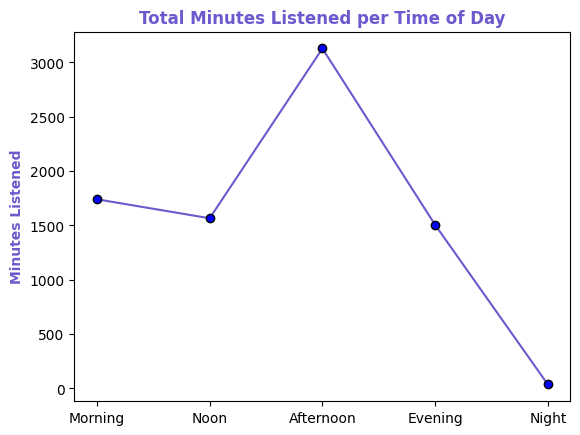

In [21]:
# Creating the graph to display minutes listened during each time of the day

min_daytime = df.groupby('timeofday')['minsPlayed'].sum().reindex(timegroup)
plt.plot(min_daytime, color='slateblue', marker="o", mfc='blue', mec= "k")
#mfc= 'marker face color', mec= 'marker edge color'
plt.ylabel('Minutes Listened', fontweight="bold", color="slateblue")
plt.title('Total Minutes Listened per Time of Day', fontweight="bold", color="slateblue")
plt.show()

Analysis: From this line chart we can tell that I listened to music mostly in the Afternoon and the least during the Night (which is probably common amongst most listeners). Given this information, new music suggestions should be played in the Afternoon. 

# Q: What are the Top 10 Streamed Songs?

In [22]:
# Extract the number of times each song (track) name appears in the data
pd.value_counts(df['trackName'])

/var/folders/tp/j3mvvxds52n7rj5kv29frw780000gn/T/ipykernel_13586/2343928485.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['trackName'])


trackName
Golden                              13
Your Love Is King                   10
Água de Beber                        9
Só Danço Samba                       9
Sambalero                            9
                                    ..
Come Rain Or Come Shine (Take 5)     1
Keep Me                              1
Lay Me Down To Sleep                 1
In Reverence                         1
Still Are                            1
Name: count, Length: 1285, dtype: int64

In [23]:
#Display the first 10 songs from the "trackName" column
pd.value_counts(df['trackName']).head(10)

/var/folders/tp/j3mvvxds52n7rj5kv29frw780000gn/T/ipykernel_13586/3324534566.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['trackName']).head(10)


trackName
Golden                                    13
Your Love Is King                         10
Água de Beber                              9
Só Danço Samba                             9
Sambalero                                  9
Like a Tattoo                              9
Insensatez                                 8
The Princess Pleads For Wallace's Life     8
No Ordinary Love                           7
Triste                                     7
Name: count, dtype: int64

/var/folders/tp/j3mvvxds52n7rj5kv29frw780000gn/T/ipykernel_13586/1619210772.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['trackName']).head(10).plot(kind='bar', color='cornflowerblue')


Text(0.5, 0, 'Songs')

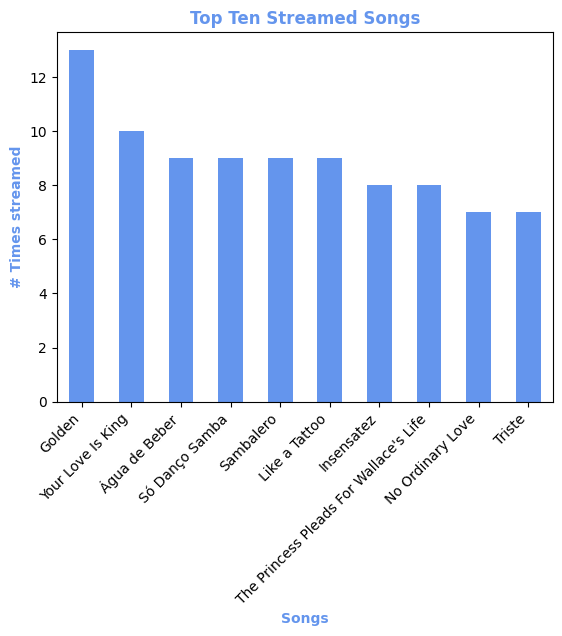

In [24]:
#Create a bar graph showing top 10 played songs and number of times they were streamed during this 1 year period
pd.value_counts(df['trackName']).head(10).plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Streamed Songs', fontweight="bold",color='cornflowerblue')
plt.ylabel('# Times streamed', fontweight="bold", color='cornflowerblue')
plt.xlabel('Songs', fontweight="bold", color='cornflowerblue')


Analysis: Most played song is 'Golden' by Jill Scott. These most loved songs are probably used by Spotify's algorithm that auto-plays music in the same genres or artists, like artist radio for example, something Spotify already does very well!

# Q: Who are the Top 20 Streamed Artists?

In [25]:
#Count the times an artist was streamed during that 1 year period
pd.value_counts(df['artistName'])

/var/folders/tp/j3mvvxds52n7rj5kv29frw780000gn/T/ipykernel_13586/1267608368.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['artistName'])


artistName
Stan Getz               144
Jill Scott               94
Sade                     89
Antônio Carlos Jobim     50
Luiz Bonfá               33
                       ... 
Affonsinho                1
Nikki Yanofsky            1
Sarah McKenzie            1
Till Brönner              1
Joseph Nimoh              1
Name: count, Length: 615, dtype: int64

In [26]:
#View the top 20 streamed artists 
pd.value_counts(df['artistName']).head(20)

/var/folders/tp/j3mvvxds52n7rj5kv29frw780000gn/T/ipykernel_13586/2361733101.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['artistName']).head(20)


artistName
Stan Getz               144
Jill Scott               94
Sade                     89
Antônio Carlos Jobim     50
Luiz Bonfá               33
James Horner             23
Moby                     22
Hans Zimmer              20
João Donato              20
Erykah Badu              20
Alanna Crouch            20
João Gilberto            19
Astrud Gilberto          19
Ike Quebec               19
Maxwell                  19
Tommaso Farinetti        18
Ólafur Arnalds           17
Oscar Peterson Trio      16
Reflection Eternal       16
Eric B. & Rakim          16
Name: count, dtype: int64

/var/folders/tp/j3mvvxds52n7rj5kv29frw780000gn/T/ipykernel_13586/155154666.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['artistName']).head(20).plot(kind='barh', color='lightseagreen')


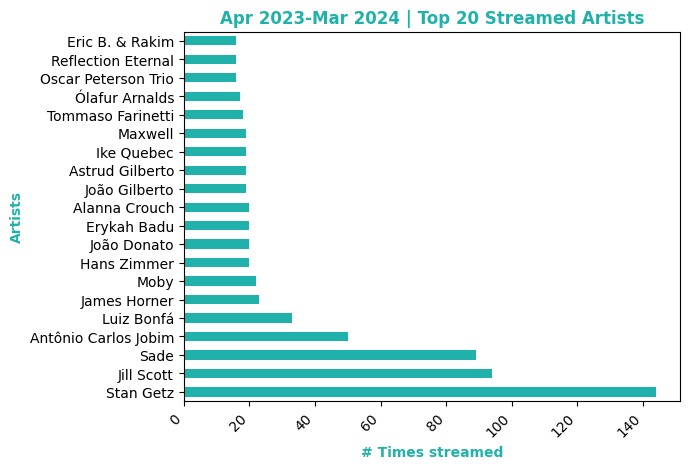

In [27]:
#Create a bar graph showing top 20 artist based on number of times they were streamed during this 1 year period
pd.value_counts(df['artistName']).head(20).plot(kind='barh', color='lightseagreen')
plt.xticks(rotation=45, ha='right')
plt.title('Apr 2023-Mar 2024 | Top 20 Streamed Artists', fontweight="bold", color='lightseagreen')
plt.ylabel('Artists', fontweight="bold", color='lightseagreen')
plt.xlabel('# Times streamed', fontweight="bold", color='lightseagreen')
figsize=(50,50)

Analysis: 'Stan Getz' is the most listened to artist. Spotify should target more of his songs, songs from the same genre of music or at least auto-play these songs when a playlists is finished or songs are not queued. This will help me discover new songs I like, making me likely to use the app more often.

-------------------------------------------------------------------------------------------------------------------------------